In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
dt = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [3]:
dt.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [4]:
dt.shape

(7787, 12)

# Cleaning data

In [5]:
import re
dt['duration'] = dt['duration'].map(lambda x : re.sub('[^0-9]','',x))
dt['duration'] = pd.to_numeric(dt['duration'])

In [6]:
dt_movies = dt.loc[dt['type']=='Movie']
dt_movies


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


In [7]:
dt_shows = dt.loc[dt['type']=='TV Show']
dt_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


# TV Shows and Movies by the country of origin

<AxesSubplot:xlabel='count', ylabel='country'>

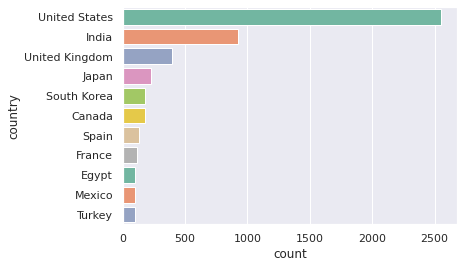

In [8]:
import seaborn as sns
import matplotlib.pyplot as pl

sns.set(style="darkgrid")
sns.countplot(y="country", data=dt, palette="Set2", order=dt['country'].value_counts().index[0:11])

# TV shows by country of origin

In [9]:
dt_shows_country = pd.DataFrame({'country':dt_shows['country'].value_counts()})
dt_shows_country[:11]


,country
United States,705
United Kingdom,204
Japan,157
South Korea,147
India,71
Taiwan,68
Canada,59
France,46
Australia,46
Spain,45


# Movies by the country of origin

In [10]:
dt_movies_country = pd.DataFrame({'country':dt_movies['country'].value_counts()})
dt_movies_country[:11]

,country
United States,1850
India,852
United Kingdom,193
Canada,118
Egypt,89
Spain,89
Turkey,73
Philippines,70
France,69
Japan,69


# Ratings

<AxesSubplot:xlabel='rating', ylabel='count'>

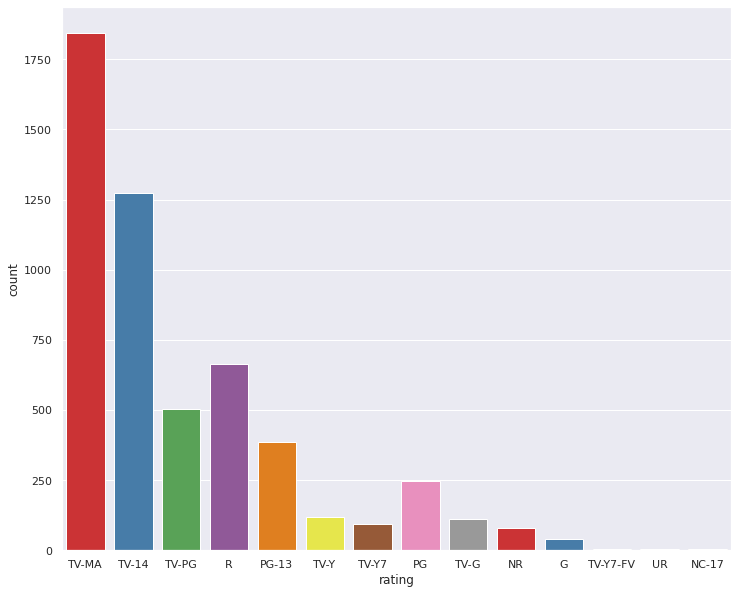

In [11]:
pl.figure(figsize=(12,10))
sns.countplot(x = "rating", data=dt_movies, palette="Set1", order=dt['rating'].value_counts().index[:15])

# Runtime

In [12]:
top10_shows = dt_shows.sort_values(by=['duration'])[-1:-11:-1]
top10_shows[['title','duration']]

,title,duration
2538,Grey's Anatomy,16
4438,NCIS,15
5912,Supernatural,15
5137,Red vs. Blue,13
1471,COMEDIANS of the world,13
1537,Criminal Minds,12
7169,Trailer Park Boys,12
2263,Frasier,11
2678,Heartland,11
1300,Cheers,11


<AxesSubplot:xlabel='duration', ylabel='title'>

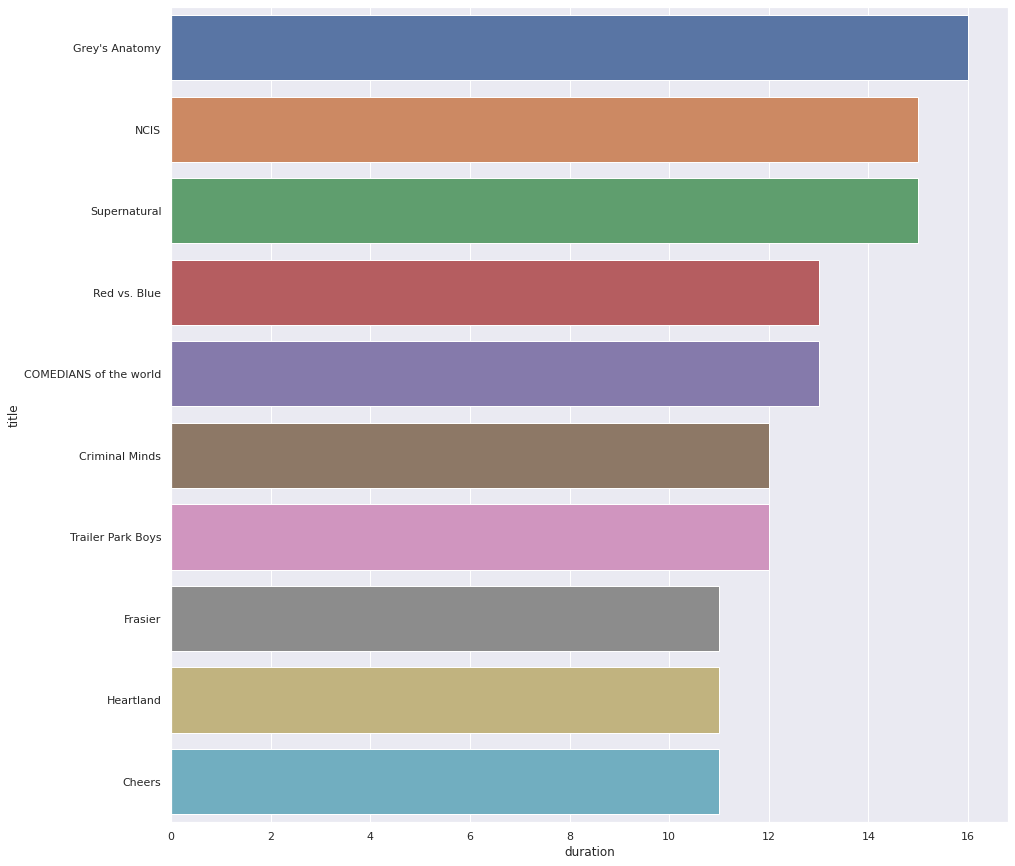

In [13]:
pl.figure(figsize=(15,15))
sns.barplot(y = top10_shows['title'], x = top10_shows['duration'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

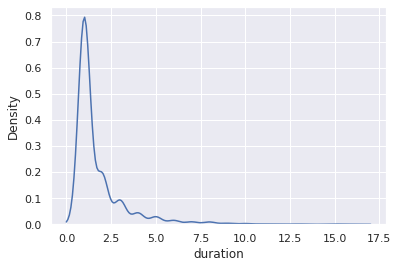

In [14]:
sns.kdeplot(data = dt_shows['duration'])

In [15]:
top10_movies = dt_movies.sort_values(by='duration')[-1:-11:-1]
top10_movies[['title','duration']]

,title,duration
957,Black Mirror: Bandersnatch,312
6850,The School of Mischief,253
4490,No Longer kids,237
3694,Lock Your Girls In,233
5108,Raya and Sakina,230
5376,Sangam,228
3521,Lagaan,224
3195,Jodhaa Akbar,214
6507,The Irishman,209
3282,Kabhi Khushi Kabhie Gham,209


<AxesSubplot:xlabel='duration', ylabel='title'>

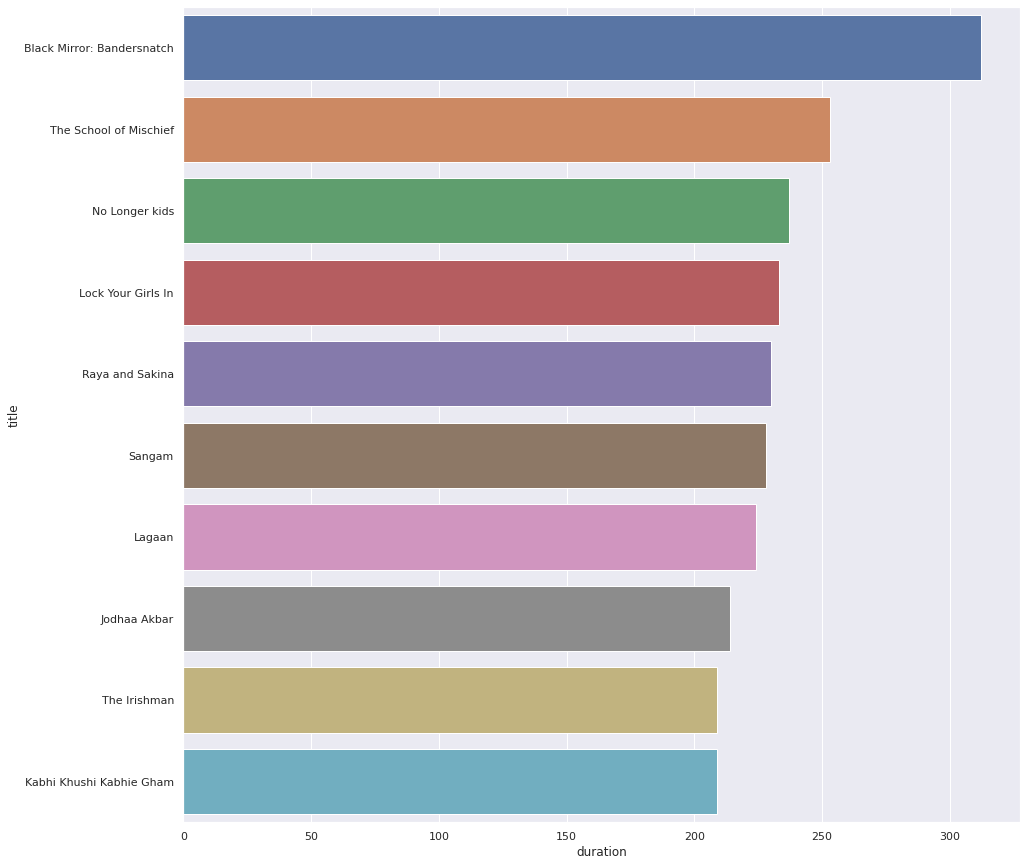

In [16]:
pl.figure(figsize=(15,15))
sns.barplot(x = top10_movies['duration'], y = top10_movies['title'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

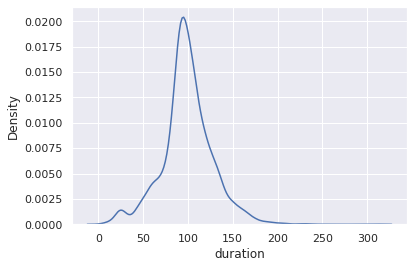

In [17]:
sns.set(style="darkgrid")
sns.kdeplot(data = dt_movies['duration'])

# Analysis by Date

* by month

In [18]:
dt[['title','date_added']]
dt['date_added'] = pd.to_datetime(dt['date_added'])

dt['month_added'] = dt['date_added'].dt.month

dt['month_added']

0        8.0
1       12.0
2       12.0
3       11.0
4        1.0
        ... 
7782    10.0
7783     3.0
7784     9.0
7785    10.0
7786     3.0
Name: month_added, Length: 7787, dtype: float64

<AxesSubplot:xlabel='count', ylabel='month_added'>

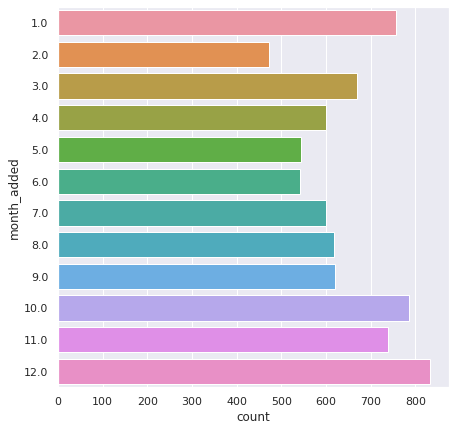

In [19]:
pl.figure(figsize=(7,7))
sns.countplot(y = 'month_added', data = dt)


<AxesSubplot:xlabel='month_added', ylabel='Density'>

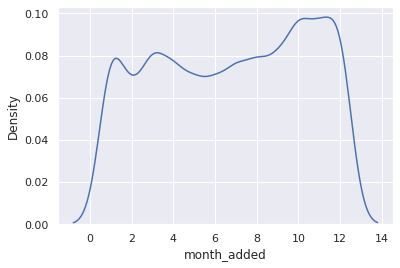

In [20]:
sns.kdeplot(x='month_added', data=dt)

* by year

<AxesSubplot:xlabel='count', ylabel='year_added'>

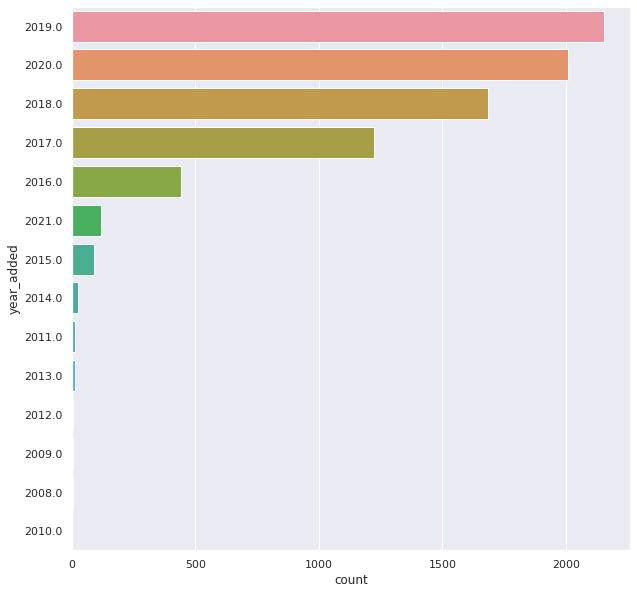

In [21]:
dt['year_added'] = dt['date_added'].dt.year
dt['year_added']
pl.figure(figsize=(10,10))
sns.countplot(y = 'year_added', data=dt, order = dt['year_added'].value_counts().index[:15])

>Will keep updating it in the future